In [2]:
#Importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [3]:
#Importing Dataset

path = r'C:\Users\ranji\Boat Analysis'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_filtered.csv'), index_col = 0)

In [3]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Price (EUR),Length,Width,Material,Number of views last 7 days,Location
106,Sport Boat,Draco power boats,"Used boat,Unleaded",1984,10400,6.00,2.30,GRP,418,Switzerland
116,Sport Boat,Supra power boats,"Used boat,Unleaded",1991,11000,6.18,2.42,GRP,256,Switzerland
117,Pontoon Boat,MÃ¤ndli power boats,Used boat,2006,11000,7.00,1.90,Wood,230,Switzerland
118,Fishing Boat,MÃ¤ndli power boats,"Used boat,Unleaded",2006,11000,6.00,1.60,GRP,182,Switzerland
132,Sport Boat,Bayliner power boats,Used boat,1988,11000,6.30,2.34,GRP,284,Italy


In [4]:
df_sub =  df[['Year Built', 'Price (EUR)', 'Length', 'Width', 'Number of views last 7 days']]

In [5]:
df_sub.head()

,Year Built,Price (EUR),Length,Width,Number of views last 7 days
106,1984,10400,6.00,2.30,418
116,1991,11000,6.18,2.42,256
117,2006,11000,7.00,1.90,230
118,2006,11000,6.00,1.60,182
132,1988,11000,6.30,2.34,284


In [6]:
df_sub.dtypes

Year Built                       int64
Price (EUR)                      int64
Length                         float64
Width                          float64
Number of views last 7 days      int64
dtype: object

## The Elbow technique

In [7]:
# Defining the range of potential clusters in the data.
num_cl = range(1, 10)

# Defining k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [8]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))]

score

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


[-1678865728094.6658,
 -438556608908.35645,
 -198146878267.03073,
 -109178912998.32404,
 -69426034413.7441,
 -48346865961.51623,
 -35099346597.69433,
 -25956855832.472485,
 -20167098208.201565]

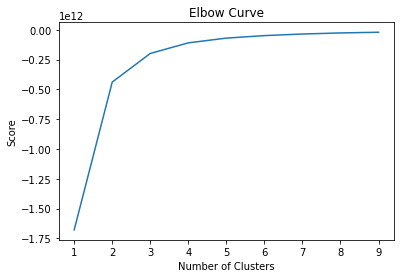

In [9]:
# Elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As the curve slowly straightens after 3, I will use 3 as the number of clusters here.

## k-means clustering

In [10]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [11]:
# Fitting the k-means object to the data.

kmeans.fit(df_sub)

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [12]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\ranji\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\ranji\AppData\Local\Temp/ipykernel_25996/4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [13]:
df_sub['clusters'].value_counts()

2    1093
0     913
1     694
Name: clusters, dtype: int64

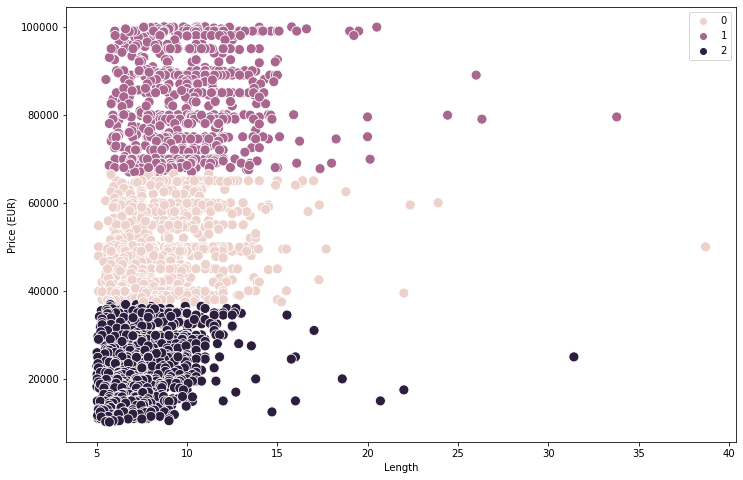

In [14]:
# Plotting the clusters for the "Length" and "Price (EUR)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Length'], y=df_sub['Price (EUR)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length') 
plt.ylabel('Price (EUR)') 
plt.show()

We see a slight increase Pink bubles towards the right showing more high price boats that are slightly longer.

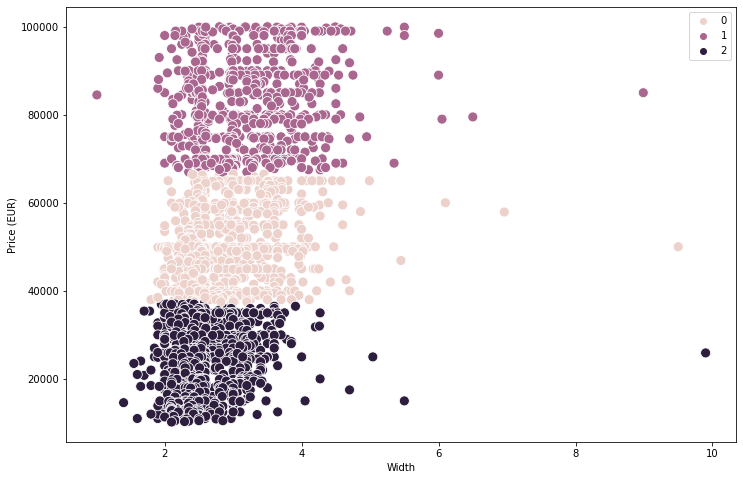

In [15]:
# Plotting the clusters for the "Width" and "Price (EUR)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Width'], y=df_sub['Price (EUR)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Width') 
plt.ylabel('Price (EUR)') 
plt.show()

We see a slight increase Pink bubles towards the right showing more high price boats that are slightly wider.

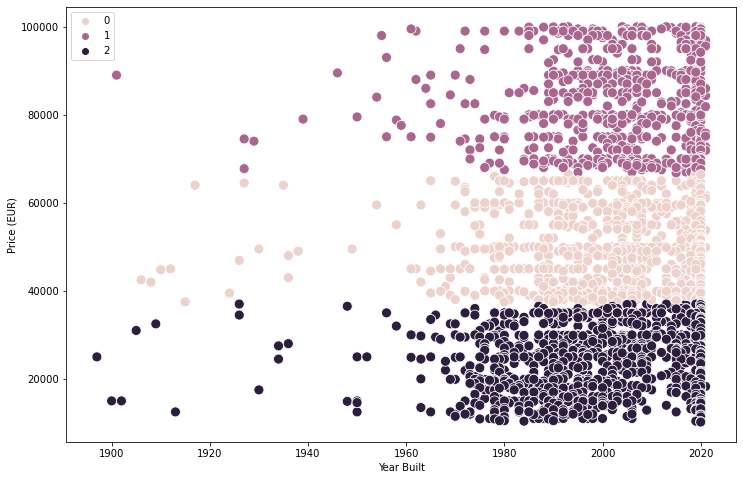

In [16]:
# Plotting the clusters for the "Width" and "Price (EUR)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Year Built'], y=df_sub['Price (EUR)'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Price (EUR)') 
plt.show()

We do see a slight relation where most of the higher costing boats are grouped towards the right (Latest year built)

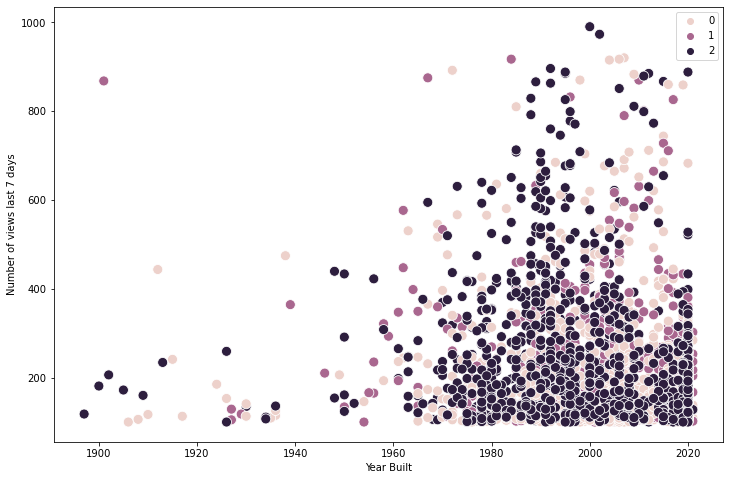

In [19]:
# Plotting the clusters for the "Width" and "Price (EUR)" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Year Built'], y=df_sub['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Number of views last 7 days') 
plt.show()

We do not see much of a relation in this chart

In [23]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\ranji\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\ranji\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [24]:
df_sub.groupby('cluster').agg({'Year Built':['mean', 'median'], 
                         'Price (EUR)':['mean', 'median'], 
                         'Length':['mean', 'median'],
                          'Width':['mean', 'median'],
                        'Number of views last 7 days':['mean', 'median'],})

Year Built           Price (EUR)              Length         \
                    mean  median          mean   median       mean median   
cluster                                                                     
dark purple  1998.377859  1999.0  24122.536139  24900.0   7.547877   7.20   
pink         2001.940854  2005.0  50540.467689  49900.0   8.831928   8.50   
purple       2002.902017  2005.0  83033.446686  82700.0  10.091499   9.95   

                Width        Number of views last 7 days         
                 mean median                        mean median  
cluster                                                          
dark purple  2.615892   2.50                  245.358646  193.0  
pink         2.930219   2.80                  210.281490  164.0  
purple       3.225403   3.19                  205.299712  162.0

Looking at the numbers, we see a few relationships that can be defined here:

1) The lower priced boats have more number of views.

2) The higher priced boats are slightly longer and wider.

3) There are more lower priced boats with an old built year.


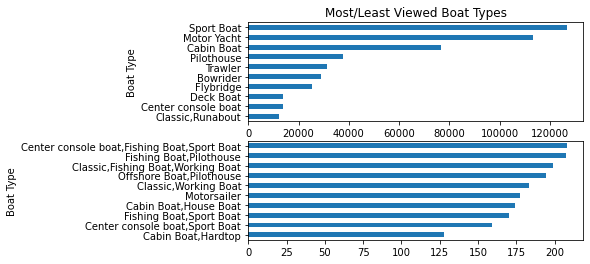

In [37]:
# Create grouped dataframe
groupedby_boat_type = df.groupby('Boat Type')['Number of views last 7 days'].sum().sort_values()

# Setting up figure and axis
fig, (ax1, ax2) = plt.subplots(2)

# Plot the least and most viewed boat types
groupedby_boat_type.head(10).plot(kind='barh',ylabel='Views', ax=ax2)
groupedby_boat_type.tail(10).plot(kind='barh',title='Most/Least Viewed Boat Types',ylabel='Views', ax=ax1);

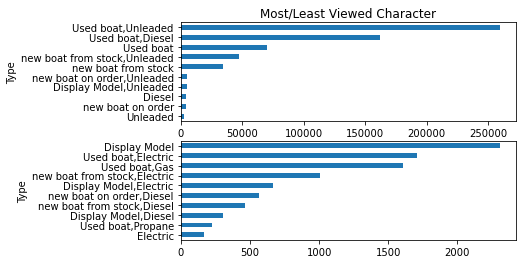

In [39]:
# Create grouped dataframe
groupedby_type = df.groupby('Type')['Number of views last 7 days'].sum().sort_values()

# Setting up figure and axis
fig, (ax1, ax2) = plt.subplots(2)

# Plot the least and most viewed manufacturer
groupedby_type.head(10).plot(kind='barh',ylabel='Views', ax=ax2)
groupedby_type.tail(10).plot(kind='barh',title='Most/Least Viewed Character',ylabel='Views', ax=ax1);

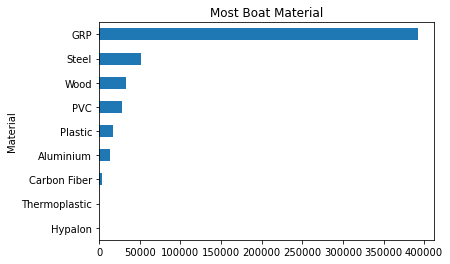

In [14]:
# Create grouped dataframe
groupedby_type = df.groupby('Material')['Number of views last 7 days'].sum().sort_values()

# Setting up figure and axis
fig, (ax1) = plt.subplots(1)

# Plot the least and most viewed manufacturer
groupedby_type.tail(10).plot(kind='barh',title='Most Boat Material',ylabel='Views', ax=ax1);